# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
'''
Observations:
    . There is an inverse correlation in the Northern hemisphere between the Latitude and the Max Temperature, the further
        from the equator, the colder it gets, which it was expected.
    . In the same way, there is a positive correlation in the Southern hemisphere between the Latitude and the Max Temperature,
        the closer to the Equator, the warmer it gets, which it was also expected.
    . There seems to be no correlation in general, between the Latitude, and the other measurements: Wind Speed, Cloudiness,
        and Humidity
'''

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Url for open weather api units in imperial to show temperature in Farenheit
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [128]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [129]:
# set up lists to hold reponse info
cities_found = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beggining Data Retrieval")
print('-----------------------------')
# Loop through the list of cities and perform a request for data on each
set_number = 1
record_number = 1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f'Processing Record {record_number} of Set {set_number} | {city}')
        record_number = record_number + 1
        if record_number == 50:
            set_number = set_number + 1
            record_number = 1
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        cities_found.append(city)
        
    except:
        print("City not found. Skipping... ")
    

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

Beggining Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping... 
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | turukhansk
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | cumberland
Processing Record 12 of Set 1 | ilinskiy
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | nanakuli
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | sembakung
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | zlatoustovsk
City not found. Skipping... 
Processing Record 21 of Set 1 | husavik
Processing Record 2

Processing Record 39 of Set 4 | suez
Processing Record 40 of Set 4 | illoqqortoormiut
City not found. Skipping... 
Processing Record 41 of Set 4 | lesozavodsk
Processing Record 42 of Set 4 | marzuq
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | kemerovo
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | isangel
Processing Record 1 of Set 5 | mahajanga
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | nioro
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | tessalit
Processing Record 6 of Set 5 | wausau
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | nageshwari
Processing Record 9 of Set 5 | ballina
Processing Record 10 of Set 5 | bandar-e lengeh
Processing Record 11 of Set 5 | dukat
Processing Record 12 of Set 5 | bavly
Processing Record 13 of

Processing Record 33 of Set 8 | san jose
Processing Record 34 of Set 8 | rudnaya pristan
Processing Record 35 of Set 8 | ilulissat
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | ladario
Processing Record 38 of Set 8 | gardan diwal
City not found. Skipping... 
Processing Record 39 of Set 8 | mareeba
Processing Record 40 of Set 8 | garissa
Processing Record 41 of Set 8 | zachagansk
City not found. Skipping... 
Processing Record 42 of Set 8 | nurota
Processing Record 43 of Set 8 | quatre cocos
Processing Record 44 of Set 8 | kungurtug
Processing Record 45 of Set 8 | north bend
Processing Record 46 of Set 8 | ayagoz
Processing Record 47 of Set 8 | juneau
Processing Record 48 of Set 8 | nuuk
Processing Record 49 of Set 8 | marawi
Processing Record 1 of Set 9 | aksu
Processing Record 2 of Set 9 | huilong
Processing Record 3 of Set 9 | oksfjord
Processing Record 4 of Set 9 | iberia
Processing Record 5 of Set 9 | pocone
Processing Record 6 of Set 9 | mogadishu
Process

Processing Record 25 of Set 12 | kampene
Processing Record 26 of Set 12 | palembang
Processing Record 27 of Set 12 | pamekasan
Processing Record 28 of Set 12 | dingle
Processing Record 29 of Set 12 | sawai madhopur
Processing Record 30 of Set 12 | marsa matruh
Processing Record 31 of Set 12 | montepuez
Processing Record 32 of Set 12 | xining
Processing Record 33 of Set 12 | kirovskiy
Processing Record 34 of Set 12 | sal rei
Processing Record 35 of Set 12 | rapid valley
Processing Record 36 of Set 12 | bucerias
Processing Record 37 of Set 12 | berdigestyakh
Processing Record 38 of Set 12 | sorland
Processing Record 39 of Set 12 | beni mazar
Processing Record 40 of Set 12 | worcester
Processing Record 41 of Set 12 | nikki
Processing Record 42 of Set 12 | higueron
Processing Record 43 of Set 12 | basco
Processing Record 44 of Set 12 | alice springs
Processing Record 45 of Set 12 | kumbo
Processing Record 46 of Set 12 | pochutla
Processing Record 47 of Set 12 | autopan
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [130]:
weather_dict = {
    'City': cities_found,
    'Lat': lat,
    'Lon': lon,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [131]:
weather_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,63.91,82,3,3.69,AU,1651187086
1,sao filipe,14.8961,-24.4956,71.64,71,3,6.87,CV,1651187041
2,hobart,-42.8794,147.3294,64.27,90,20,5.75,AU,1651187296
3,turukhansk,65.8167,87.9833,33.57,98,100,7.23,RU,1651187060
4,mataura,-46.1927,168.8643,56.48,79,13,1.07,NZ,1651187297
...,...,...,...,...,...,...,...,...,...
537,basco,20.4487,121.9702,82.69,85,4,19.51,PH,1651187605
538,alice springs,-23.7000,133.8833,76.55,33,25,0.00,AU,1651187461
539,kumbo,6.2000,10.6667,60.60,94,73,1.36,CM,1651187606
540,pochutla,15.7432,-96.4661,87.82,54,60,7.05,MX,1651187607


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [132]:
len(weather_data)


542

In [133]:
weather_data_clean = weather_data.loc[weather_data['Humidity'] > 100]
clean_city_data = weather_data
#weather_data_clean
if len(weather_data_clean) > 0:
    #  Get the indices of cities that have humidity over 100%.
    indices = []
    indices = weather_data_clean.index
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
    clean_city_data = weather_data.drop(indices, inplace = False)
    #print(clean_city_data)
len(clean_city_data)

542

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [134]:
from datetime import datetime
time = datetime.now()  
date = time.strftime("%m/%d/%y")

## Latitude vs. Temperature Plot

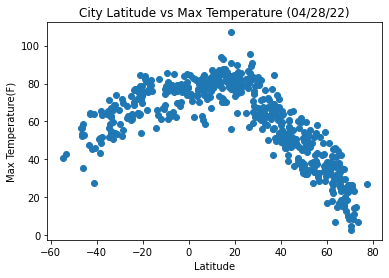

In [135]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Temperature (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.show()

## Latitude vs. Humidity Plot

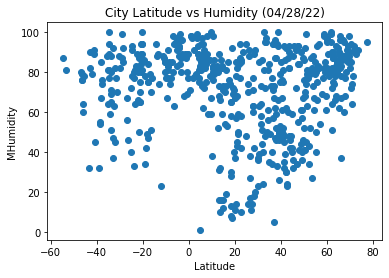

In [136]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('MHumidity')
plt.show()

## Latitude vs. Cloudiness Plot

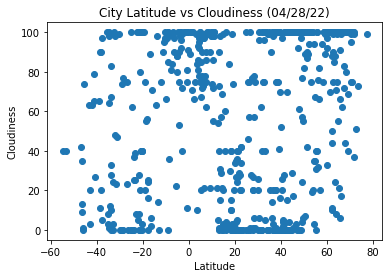

In [137]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

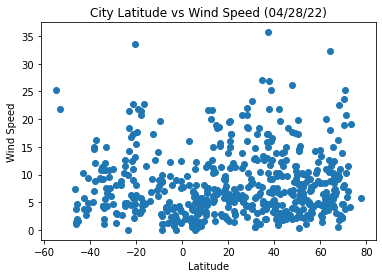

In [138]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed (' + date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [139]:
northern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
#northern_hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]
#outhern_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [140]:
def make_plot(x_values, y_values, x_pos, y_pos, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_pos, y_pos),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.7956601723273313


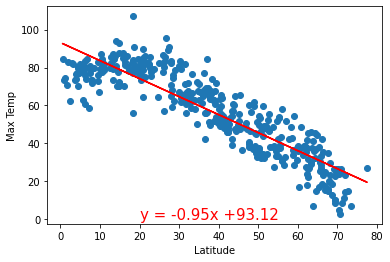

In [141]:
from scipy import stats
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
make_plot(x_values, y_values, 20, 0, 'Latitude', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.529818769042653


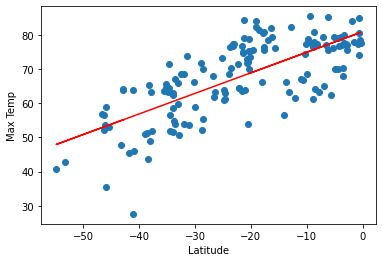

In [142]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
make_plot(x_values, y_values, -50, 90, 'Latitude', 'Max Temp')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.027047363051538712


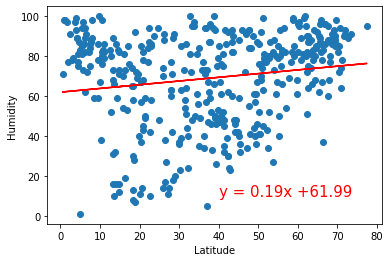

In [143]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
make_plot(x_values, y_values, 40, 10, 'Latitude', 'Humidity')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0686844789590804


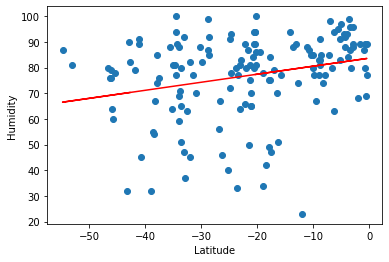

In [144]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
make_plot(x_values, y_values, -50, 10, 'Latitude', 'Humidity')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03738212411595385


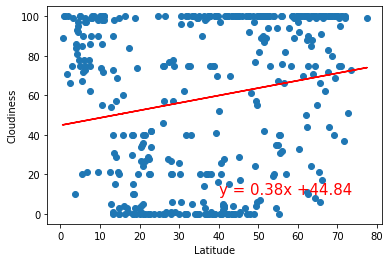

In [145]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
make_plot(x_values, y_values, 40, 10, 'Latitude', 'Cloudiness')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15422397944795435


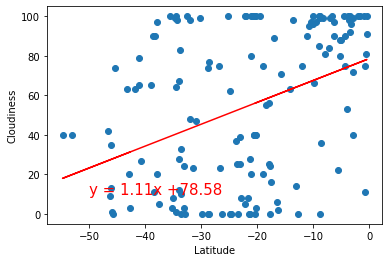

In [146]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
make_plot(x_values, y_values, -50, 10, 'Latitude', 'Cloudiness')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007020035163988124


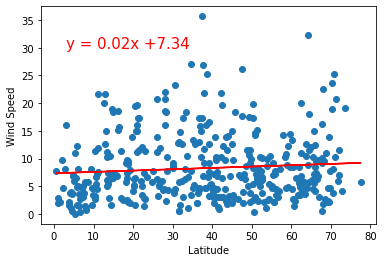

In [147]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
make_plot(x_values, y_values, 3, 30, 'Latitude', 'Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.023081332491352264


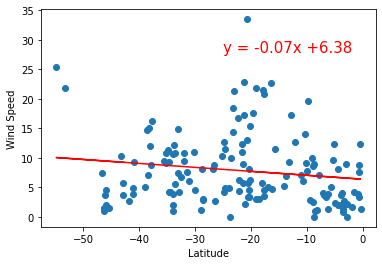

In [148]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
make_plot(x_values, y_values, -25, 28, 'Latitude', 'Wind Speed')
